In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
# Загрузка данных из файла
data = pd.read_csv('data/spambase.data', header = None).values
# Разделение на классы и атрибуты
attributes = data[:, :-1]
classes = np.ravel(data[:, -1:].astype(np.int64, copy=False))
# Выделение обучающей и тестовой выборки
x_train, x_test, y_train, y_test = train_test_split(
    attributes, classes, test_size=0.3, random_state=42)

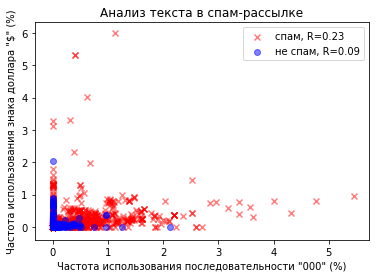

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

count = int(len(attributes)) # сколько берётся записей
for c,marker,color in zip((1, 0), ('x', 'o'), ('red', 'blue')):
    a1 = [attributes[i][22] for i in range(count) if classes[i] == c]
    a2 = [attributes[i][52] for i in range(count) if classes[i] == c]
    R = pearsonr(a1, a2)
    label = 'спам' if c == 1 else 'не спам'
    plt.scatter(x=a1, y=a2, marker=marker, color=color, alpha=0.5,
               label='{:}, R={:.2f}'.format(label, R[0]))

    
# Отрисовка данных
plt.title('Анализ текста в спам-рассылке')
plt.xlabel('Частота использования последовательности "000" (%)')
plt.ylabel('Частота использования знака доллара "$" (%)')
plt.legend(loc='upper right')
plt.show()

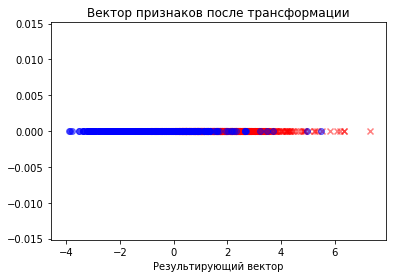

In [34]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
trans = lda.fit(x_train, y_train).transform(x_train)
for c,marker,color in zip((1, 0), ('x', 'o'), ('red', 'blue')):
    x = [trans[i] for i in range(len(trans)) if y_train[i] == c]
    y = [0 for i in range(len(x))]
    label = 'спам' if c == 1 else 'не спам'
    plt.scatter(x=x, y=y, marker=marker, color=color, alpha=0.5,
               label='{:}, R={:.2f}'.format(label, R[0]))
plt.xlabel('Результирующий вектор')
plt.title('Вектор признаков после трансформации')
plt.show()

In [42]:
# Обучение и тестирование
print('Точность LDA: {:.2f}'.format(lda.score(x_test, y_test)))

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)
print('Точность QDA: {:.2f}'.format(qda.score(x_test, y_test)))

Точность LDA: 0.89
Точность QDA: 0.82


X:\Programs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
